# 데이터 탐색 (Data Exploration)

이 노트북에서는 각 도메인의 데이터셋을 탐색하고 샘플 이미지를 확인합니다.

**지원 데이터셋:**
- ImageNet-C (Natural images with corruptions)
- LDCT (Low-Dose CT)
- DIBCO (Document binarization)
- FMD (Fluorescence Microscopy Denoising)

In [1]:
import sys
sys.path.insert(0, '..')

import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import torch

# 프로젝트 모듈
from src.data.datasets import get_dataset, ImageNetCDataset, LDCTDataset, DIBCODataset, FMDDataset
from src.data.loader import get_default_transform

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. 데이터 경로 설정

아래 경로를 실제 데이터 위치로 수정하세요.

In [2]:
# 데이터 루트 경로 설정 (수정 필요)
DATA_ROOT = Path('../data')

# 각 도메인별 경로
PATHS = {
    'imagenet': DATA_ROOT / 'imagenet-c',
    'ldct': DATA_ROOT / 'ldct',
    'dibco': DATA_ROOT / 'dibco',
    'fmd': DATA_ROOT / 'fmd',
}

# 존재하는 데이터셋 확인
print("데이터셋 상태:")
for name, path in PATHS.items():
    exists = path.exists()
    status = "✓ 존재" if exists else "✗ 없음"
    print(f"  {name:12s}: {status} ({path})")

데이터셋 상태:
  imagenet    : ✓ 존재 (..\data\imagenet-c)
  ldct        : ✓ 존재 (..\data\ldct)
  dibco       : ✓ 존재 (..\data\dibco)
  fmd         : ✓ 존재 (..\data\fmd)


## 2. 유틸리티 함수

In [3]:
def show_image_pair(degraded, clean, title="", figsize=(10, 4)):
    """열화 이미지와 원본 이미지 쌍을 표시"""
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Tensor -> numpy 변환
    if isinstance(degraded, torch.Tensor):
        degraded = degraded.permute(1, 2, 0).numpy()
        degraded = (degraded * 0.5 + 0.5).clip(0, 1)  # [-1,1] -> [0,1]
    if isinstance(clean, torch.Tensor):
        clean = clean.permute(1, 2, 0).numpy()
        clean = (clean * 0.5 + 0.5).clip(0, 1)
    
    axes[0].imshow(degraded)
    axes[0].set_title('Degraded')
    axes[0].axis('off')
    
    axes[1].imshow(clean)
    axes[1].set_title('Clean (GT)')
    axes[1].axis('off')
    
    if title:
        fig.suptitle(title, fontsize=12)
    plt.tight_layout()
    plt.show()


def show_sample_grid(dataset, n_samples=4, title=""):
    """데이터셋에서 여러 샘플을 그리드로 표시"""
    if len(dataset) == 0:
        print(f"데이터셋이 비어있습니다: {title}")
        return
    
    n_samples = min(n_samples, len(dataset))
    fig, axes = plt.subplots(2, n_samples, figsize=(3*n_samples, 6))
    
    indices = np.random.choice(len(dataset), n_samples, replace=False)
    
    for i, idx in enumerate(indices):
        item = dataset[idx]
        degraded = item['degraded']
        clean = item['clean']
        
        # Tensor -> numpy
        if isinstance(degraded, torch.Tensor):
            degraded = degraded.permute(1, 2, 0).numpy()
            degraded = (degraded * 0.5 + 0.5).clip(0, 1)
        if isinstance(clean, torch.Tensor):
            clean = clean.permute(1, 2, 0).numpy()
            clean = (clean * 0.5 + 0.5).clip(0, 1)
        
        axes[0, i].imshow(degraded)
        axes[0, i].axis('off')
        if i == 0:
            axes[0, i].set_ylabel('Degraded', fontsize=10)
        
        axes[1, i].imshow(clean)
        axes[1, i].axis('off')
        if i == 0:
            axes[1, i].set_ylabel('Clean', fontsize=10)
    
    if title:
        fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


def dataset_statistics(dataset, name=""):
    """데이터셋 통계 출력"""
    print(f"\n{'='*50}")
    print(f"📊 {name} 데이터셋 통계")
    print(f"{'='*50}")
    print(f"  총 샘플 수: {len(dataset)}")
    
    if len(dataset) > 0:
        sample = dataset[0]
        print(f"  이미지 형태: {sample['degraded'].shape}")
        print(f"  데이터 타입: {sample['degraded'].dtype}")
        print(f"  값 범위: [{sample['degraded'].min():.2f}, {sample['degraded'].max():.2f}]")

## 3. ImageNet-C 탐색

자연 이미지에 다양한 corruption이 적용된 데이터셋

In [4]:
if PATHS['imagenet'].exists():
    transform = get_default_transform(image_size=256, train=False)
    imagenet_dataset = get_dataset('imagenet', str(PATHS['imagenet']), transform=transform)
    
    dataset_statistics(imagenet_dataset, "ImageNet-C")
    show_sample_grid(imagenet_dataset, n_samples=4, title="ImageNet-C Samples")
else:
    print("ImageNet-C 데이터가 없습니다. 경로를 확인하세요.")


📊 ImageNet-C 데이터셋 통계
  총 샘플 수: 0
데이터셋이 비어있습니다: ImageNet-C Samples


## 4. LDCT 탐색

Low-Dose CT 이미지 (의료 영상)

In [ ]:
if PATHS['ldct'].exists():
    transform = get_default_transform(image_size=256, train=False)
    # LDCT 데이터는 test 폴더에 있음
    ldct_dataset = get_dataset('ldct', str(PATHS['ldct']), split='test', transform=transform)
    
    dataset_statistics(ldct_dataset, "LDCT")
    show_sample_grid(ldct_dataset, n_samples=4, title="LDCT Samples")
else:
    print("LDCT 데이터가 없습니다. 경로를 확인하세요.")

## 5. DIBCO 탐색

문서 이진화 데이터셋


📊 DIBCO 데이터셋 통계
  총 샘플 수: 10
  이미지 형태: torch.Size([3, 256, 256])
  데이터 타입: torch.float32
  값 범위: [-0.80, 1.00]


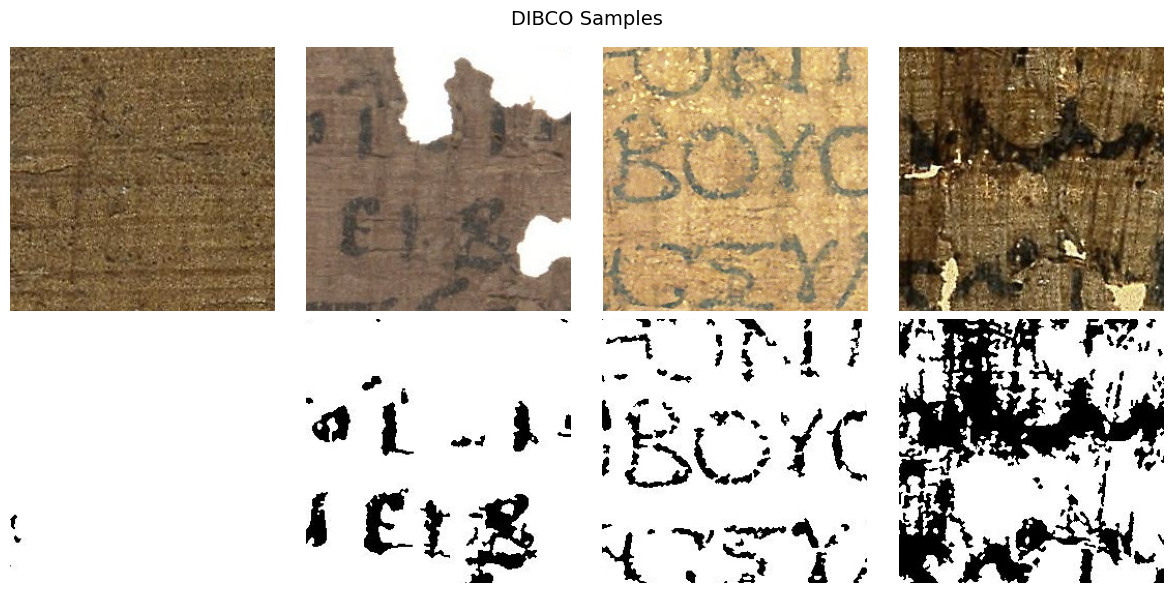

In [6]:
if PATHS['dibco'].exists():
    transform = get_default_transform(image_size=256, train=False)
    dibco_dataset = get_dataset('dibco', str(PATHS['dibco']), transform=transform)
    
    dataset_statistics(dibco_dataset, "DIBCO")
    show_sample_grid(dibco_dataset, n_samples=4, title="DIBCO Samples")
else:
    print("DIBCO 데이터가 없습니다. 경로를 확인하세요.")

## 6. FMD 탐색

형광 현미경 이미지 데이터셋


📊 FMD 데이터셋 통계
  총 샘플 수: 3000
  이미지 형태: torch.Size([3, 256, 256])
  데이터 타입: torch.float32
  값 범위: [-0.98, 0.82]


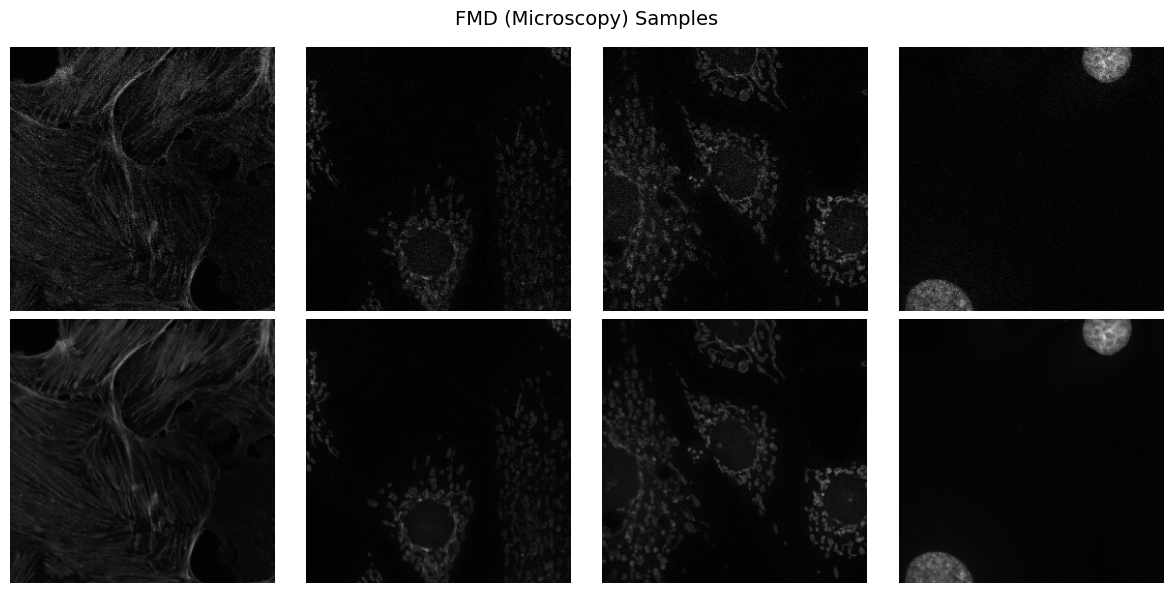

In [7]:
if PATHS['fmd'].exists():
    transform = get_default_transform(image_size=256, train=False)
    fmd_dataset = get_dataset('fmd', str(PATHS['fmd']), transform=transform)
    
    dataset_statistics(fmd_dataset, "FMD")
    show_sample_grid(fmd_dataset, n_samples=4, title="FMD (Microscopy) Samples")
else:
    print("FMD 데이터가 없습니다. 경로를 확인하세요.")

## 7. 도메인 간 비교

4개 도메인의 열화 특성 비교

In [ ]:
# 존재하는 데이터셋만 로드
datasets = {}
transform = get_default_transform(image_size=256, train=False)

for name, path in PATHS.items():
    if path.exists():
        # LDCT는 test split 사용
        split = 'test' if name == 'ldct' else 'train'
        ds = get_dataset(name, str(path), split=split, transform=transform)
        if len(ds) > 0:
            datasets[name] = ds

if datasets:
    n_domains = len(datasets)
    fig, axes = plt.subplots(2, n_domains, figsize=(4*n_domains, 8))
    
    if n_domains == 1:
        axes = axes.reshape(2, 1)
    
    for i, (name, ds) in enumerate(datasets.items()):
        idx = np.random.randint(len(ds))
        item = ds[idx]
        
        degraded = item['degraded'].permute(1, 2, 0).numpy()
        degraded = (degraded * 0.5 + 0.5).clip(0, 1)
        clean = item['clean'].permute(1, 2, 0).numpy()
        clean = (clean * 0.5 + 0.5).clip(0, 1)
        
        axes[0, i].imshow(degraded)
        axes[0, i].set_title(f'{name.upper()}\n(Degraded)')
        axes[0, i].axis('off')
        
        axes[1, i].imshow(clean)
        axes[1, i].set_title('Clean')
        axes[1, i].axis('off')
    
    plt.suptitle('Cross-Domain Comparison', fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("로드된 데이터셋이 없습니다.")

## 8. 이미지 히스토그램 분석

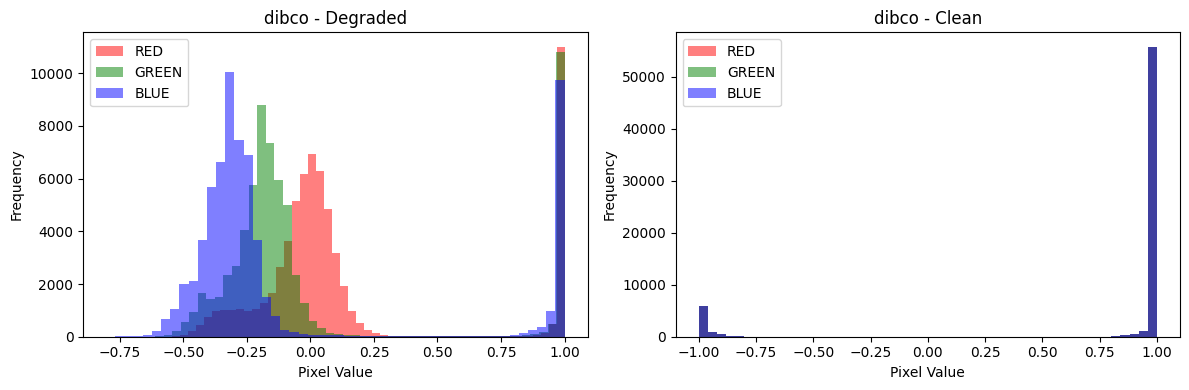

In [9]:
def plot_histogram(image, title="", ax=None):
    """이미지 히스토그램 표시"""
    if ax is None:
        fig, ax = plt.subplots()
    
    if isinstance(image, torch.Tensor):
        image = image.numpy()
    
    colors = ['red', 'green', 'blue']
    for c, color in enumerate(colors):
        ax.hist(image[c].ravel(), bins=50, alpha=0.5, color=color, label=color.upper())
    
    ax.set_title(title)
    ax.set_xlabel('Pixel Value')
    ax.set_ylabel('Frequency')
    ax.legend()

if datasets:
    # 첫 번째 데이터셋으로 히스토그램 분석
    name, ds = list(datasets.items())[0]
    item = ds[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_histogram(item['degraded'], f'{name} - Degraded', axes[0])
    plot_histogram(item['clean'], f'{name} - Clean', axes[1])
    plt.tight_layout()
    plt.show()